# 6장. 일반화 달성

### 샘플 외 데이터 검사

### 샘플 분할 테스트
##### 1. 모델이 새로운 데이터로 잘 일반화되기를 원한다면 그러한 상황에서 테스트해야함

In [7]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
datasets = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
obervation = len(dataset)
variables = dataset.columns[:-1]
x = dataset.ix[:, :-1]
y = dataset['target'].values

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


데이터셋 로드 후 훈련 부분과 테스트 부분으로 분할

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=101)
print ("Train dataset sample size: %i" % len(X_train))
print ("Test dataset sample size: %i"* % len(X_test))

SyntaxError: invalid syntax (1853772033.py, line 5)

train_test_split으로 test_size 파라미터에 표시된 테스트를 위해 지정된 할당량에 따라 데이터 분리

In [6]:
X_train, X_out_sample, y_train, y_out_sample = \
    train_test_split(X, y, test_size=0.40, random_state=101)
X_validation, X_test, y_validation, y_test = \
    train_test_split(X_out_sample, y_out_sample, test_size=0.50, random_state=101)
print ("Train dataset sample size: %i" % len(X_train))
print ("Validation dataset sample size: St" & len(X_validation) )
print ("Test dataset sample size: %i" % len(X_test))

NameError: name 'train_test_split' is not defined

#### 교차 검증 : 훈련과 테스트를 위해 데이터를 분리하고 모든 관찰이 훈련과 테스트의 역학을 수행할 때 까지 반복적으로 진행

In [18]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

def RMSE(y_true, y_pred):
    return np.sqrt(np.sum((y_true - y_pred) ** 2))

Im = LinearRegression()
cv_iterator = KFold(n_splits=10, shuffle=True, random_state=101)
edges = np.histogram(y, bins=5)[1]
binning = np.digitize(y, edges)
stratified_cv_iterator = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

second_order = PolynomialFeatures(degree=2, interaction_only=False)
third_order = PolynomialFeatures(degree=3, interaction_only=True)

over_param_X = second_order.fit_transform(X)
extra_over_param_X = third_order.fit_transform(X)

lm = Im  # Im을 LinearRegression 모델 객체로 사용할 것으로 가정합니다.

cv_score = cross_val_score(lm, over_param_X, y, cv=cv_iterator, scoring='neg_mean_squared_error', n_jobs=1)


NameError: name 'y' is not defined

In [13]:
print(cv_score)

NameError: name 'cv_score' is not defined

In [20]:
print ('Cv score: mean %0.3f std %0.3f' %
    (np.mean(np.abs(cv_score)), np.std(cv_score)))

NameError: name 'cv_score' is not defined

In [21]:
cv_score = cross_val_score(im, over_param_X, y, \
    cv=stratified_cv_iterator, scoring='mean_squared _error', \
    n_jobs=1)
print ('Cv score: mean 80.3f std 80.3f' & \
    (np. mean(np.abs(cv_score)), np.std(cv_score )))

NameError: name 'im' is not defined

#### 부트스트래핑 : 데이터의 기본 분포를 여러 번 복제해 시도함으로 훈련 및 테스트 검증 시퀀스를 반복할 수 있음

In [25]:
import random

def Bootstrap(n, n_iter=3, random_state=None):
    if random_state:
        random.seed(random_state)
    for _ in range(n_iter):
        bs = [random.randint(0, n-1) for _ in range(n)]
        out_bs = list({i for i in range(n)} - set(bs))
        yield bs, out_bs

boot = Bootstrap(n=10, n_iter=5, random_state=101)
for train_idx, validation_idx in boot:
    print(train_idx, validation_idx)


[9, 3, 8, 5, 7, 0, 8, 3, 9, 3] [1, 2, 4, 6]
[4, 7, 3, 5, 7, 1, 4, 3, 2, 1] [0, 8, 6, 9]
[7, 8, 5, 3, 7, 5, 3, 6, 6, 3] [0, 1, 2, 4, 9]
[1, 6, 7, 4, 3, 1, 9, 5, 4, 6] [0, 8, 2]
[6, 3, 6, 1, 6, 6, 0, 7, 3, 8] [9, 2, 4, 5]


각 계수가 얼마나 안정적인지 파악

In [28]:
import numpy as np
boot = Bootstrap(n=len(X), n_iter=10, random_state=101)
Im = LinearRegression()
bootstrapped_coef = np .zeros( (10,13))
for k, (train_idx, validation_idx) in enumerate(boot) :
    Im. fit(X. ix[train_idx,:],y[train_idx])
    bootstrapped_coef [k,:] = Im.coef_

NameError: name 'X' is not defined

ex) 10번째 계수 인덱스 부호와 값 살피는 코드

In [29]:
print(bootstrapped_coef [:,10])

NameError: name 'bootstrapped_coef' is not defined

#### 특성의 그리디 선택
1. 새로운 변수를 추가하는 것은 선형회귀에서 항상 큰 성공을 거둔다.
2. 올바른 변수를 추가할 때뿐만 아니라 잘못된 변수를 추가할 때도 적용된다.
3. 새로운 계수 중 일부는 데이터에 존재하는 노이즈 및 기타 세부 사항을 적합시키기 위해 사용될 수 있다.

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
Im = LinearRegression()
Im.fit(X_train, y_train)

print('Train (cases, features) = %s' % str(X_train.shape))
print('Test (cases, features) = %s' % str(X_test.shape))

print('In-sample mean squared error %.3f' % mean_squared_error(y_train, Im.predict(X_train)))
print('Out-sample mean squared error %.3f' % mean_squared_error(y_test, Im.predict(X_test)))

NameError: name 'X' is not defined

#### 마델론 데이터셋 : 노이즈가 많고 공선적인 변수 중 최상의 변수를 선ㅌ택하는 작업을 위해 사용하는 데이터셋

In [33]:
import numpy as np
import urllib.request as urllib

train_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data'
validation_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_valid.data'
train_response = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.labels'
validation_response = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/madelon_valid.labels'

try:
    Xt = np.loadtxt(urllib.urlopen(train_data))
    yt = np.loadtxt(urllib.urlopen(train_response))
    Xv = np.loadtxt(urllib.urlopen(validation_data))
    yv = np.loadtxt(urllib.urlopen(validation_response))
except:
    # In case downloading the data doesn't work, just manually download the files into the working directory
    Xt = np.loadtxt('madelon_train.data')
    yt = np.loadtxt('madelon_train.labels')
    Xv = np.loadtxt('madelon_valid.data')
    yv = np.loadtxt('madelon_valid.labels')


훈련 집합과 검증 집합 모두 로드한 후에 사용 가능한 정보 중 일부를 탐색

In [35]:
print ('Training set: %i observations %i feature' %
    (Xt. shape) )
print ('Validation set: %i observations %i feature' %
    (Xv. shape))

Training set: 2000 observations 500 feature
Validation set: 600 observations 500 feature


훈련 집합으로 상황 파악

아웃풋 : 긴 행렬 형태 -> 데이터 셋 내의 평균, 최대, 분산, 왜도, 첨도 정보 포함
모든 정보가 거의 정규분포를 가짐

In [39]:
from scipy.stats import describe
print(describe(Xt))

DescribeResult(nobs=2000, minmax=(array([462., 381., 370., 453., 371., 459., 334., 471., 430., 455., 354.,
       389., 347., 352., 444., 410., 433., 377., 408., 441., 426., 412.,
       456., 438., 343., 416., 421., 441., 438., 417., 451., 382., 369.,
       363., 384., 342., 441., 396., 464., 471., 463., 362., 392., 438.,
       406., 392., 371., 373., 367., 382., 381., 382., 399., 465., 401.,
       409., 288., 377., 378., 408., 400., 462., 377., 458., 214., 385.,
       373., 395., 462., 452., 362., 427., 402., 354., 456., 371., 446.,
       396., 379., 424., 415., 385., 396., 430., 372., 391., 458., 406.,
       454., 377., 474., 395., 399., 438., 452., 384., 468., 406., 412.,
       355., 448., 448., 460., 428., 361.,   0., 349., 370., 391., 442.,
       392., 356., 450., 385., 353., 413., 418., 441., 389., 414., 469.,
       380., 437., 355., 406., 389., 440., 387., 435., 347., 401., 420.,
       402., 461., 403., 382., 369., 425., 461., 430., 427., 376., 443.,
       452., 421.

변수들 사이의 상관관계를 그래프로 표시

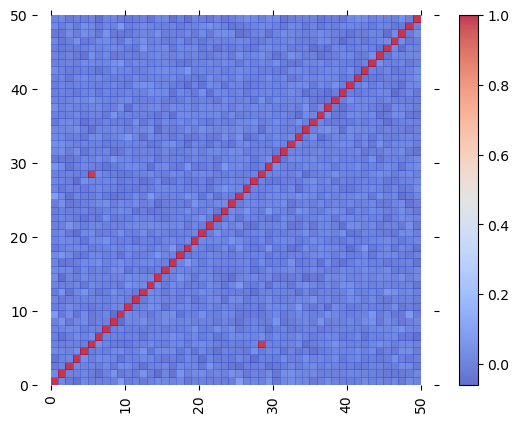

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def visualize_correlation_matrix(data, hurdle=0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    plt.xticks(rotation=90)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off')
    plt.colorbar()
    plt.axis('equal')
    plt.show()

visualize_correlation_matrix(Xt[:,100:150], hurdle=0.0)


곡선 메트릭 아래의 영역을 사용해 측정된 오류 관점에서 단순한 로지스틱회귀모델이 어떻게 점수를 매기는지 확인

로지스틱 회귀는 이런 분할이 항상 최적인 것으로 판명되므로 임계값이 0.5 이상인 경우 관찰치를 양의 값으로 분류하지만 자유롭게 변경 가능

AUC 오류 측정 : 가치 측면에서의 효과적인 정밀도에 관계없이 예측이 적절하게 정렬됐는지 여부를 판단하는 데 도움이 된다
    -> 선택 알고리즘을 평가하기 위한 이상적인 오류 측정법

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logit = LogisticRegression()
logit.fit(Xt, yt)

print('Training area under the curve: %0.3f' % roc_auc_score(yt, logit.predict_proba(Xt)[:, 1]))
print('Validation area under the curve: %0.3f' % roc_auc_score(yv, logit.predict_proba(Xv)[:, 1]))


Training area under the curve: 0.789
Validation area under the curve: 0.595


C:\Users\eun01\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 특성의 일변량 선택

In [45]:
from sklearn. feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=50)
selector. fit(Xt,yt)
variable_filter = selector.get_support()

가장 부적절한 특성을 제거하고 중요한 것들을 유지하기 위해 위쪽 절반을 선택한 후 결과를 히스토그램으로 플롯해 점수 분포를 나타냄

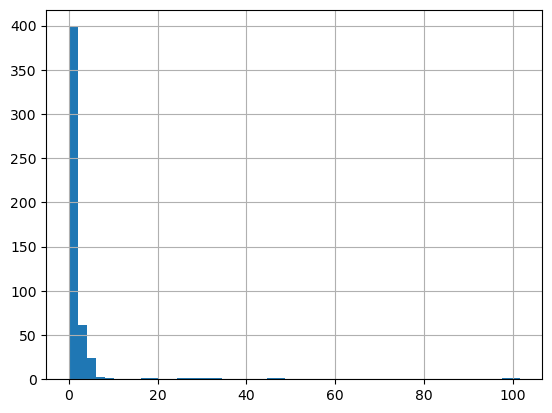

In [47]:
plt.hist(selector.scores_, bins=50, histtype='bar' )
plt. grid( )
plt. show( )

대부분의 점수는 0에 가깝고 선택한 임계값을 직접 선택해 중요한 것으로 추정되는 특성을 선택

In [48]:
print ("Number of filtered variables: si" & \
np. sum( variable_filter))
from sklearn.preprocessing import PolynomialFeatures
interactions = PolynomialFeatures(degree=2,
interaction_only=True)
Xs = interactions.fit_transform(Xt[:, variable_filter])
print ("Number of variables and interactions: %i" % Xs. shape[1])

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

데이터셋을 핵심 특성으로 축소 완료
다항식 확장을 테스트하고 모델에 관련된 모든 비선형 관계를 자동으로 포착하는 것이 좋음

In [49]:
logit.fit(Xs,yt)
Xvs = interactions.fit_transform(Xv[:,variable_fitler])
print('Validation area Under the Curve'+\
    'before recursive \ selection: %0.3f' % \
    roc_auc_score( yv, logit.predict_proba(Xvs)[:,1]))

NameError: name 'Xs' is not defined

결과 검증 점수는 약 0.81로 훈련 집합에서 제공한 초기 과잉 적합 점수 0.82를 기준으로 할 때 매우 유망한 값임

#### 재귀적 특성 선택 : 중복 변수가 자주 선택되는 문제를 피할 수 있지만 계산 비용이 소요됨

In [51]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
Lm = LinearRegression()
cv_iterator = KFold(n_splits=10, shuffle=True, random_state=101)
recursive_selector = RFECV(estimator=Lm, step=1, cv=cv_iterator, scoring='mean_squared_error')
recursive_selector.fit(second_order.fit_transform(X_train), y_train)

print('Initial number of features: %i' % second_order.fit_transform(X_train).shape[1])
print('Optimal number of features: %i' % recursive_selector.n_features_)


NameError: name 'X' is not defined

추정치, 교차 검증 반복자 및 오류 측정을 감안해 RFECV는 잠시 후에 성능이 저하될 우려없이 특성의 절반을 모델에서 삭제함

In [53]:
essential_X_train = recursive_selector.transform(second_order.fit_transform(X_train))
essential_X_test = recursive_selector.transform(second_order.fit_transform(X_test))
Im.fit(essential_X_train, y_train)

print('Cases = %i, Features = %i' % essential_X_test.shape)
print('In-sample mean squared error: %.3f' % mean_squared_error(y_train, Im.predict(essential_X_train)))
print('Out-sample mean squared error: %.3f' % mean_squared_error(y_test, Im.predict(essential_X_test)))


NameError: name 'recursive_selector' is not defined

테스트 기반 검사를 통해 결과적으로 나타난 샘플 외 성능은 11.5

In [54]:
edges = np. histogram(y, bins=5)[1]
binning = np. digitize(y, edges)
stratified
I cv_iterator = StratifiedKFold(binning, n_folds=10,
shuffle-True, random_state=101)
essential_X = recursive_selector. transform(
second _order.fit_transform(X))
cv_score = cross_val_score(
Lm, essential_X, y, cv=stratified_cv_iterator, scoring='mean_squared
Lerror', n_jobs=1)
print ('Cv score: mean %0.3f std %0.3f' %
(np. mean (np. abs(cv_score)), np. std(cv_score) ))

SyntaxError: unterminated string literal (detected at line 9) (919735037.py, line 9)

추가 확인을 위해 교차 검증을 실행

#### 그리드 검색에 의한 최적화된 정규화

1. 리지(L2 정규화) :

In [59]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ridge = Ridge()  # 정규화 없이 Ridge 모델 생성

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(second_order.fit_transform(X))

# 모델 학습
ridge.fit(X_scaled, y)

NameError: name 'second_order' is not defined

알파 값이 작을수록 계수 값이 정규화에 의해 제어되는 양이 적어지며 정규화가 증가해 값이 커질수록 계수는 더 많이 줄어든다
이 기능은 값이 높을 수록 모델의 복잡성이 줄어드는 축소 파라미터로 쉽게 기억됨

모델을 완전히 적합시킨 후 계수의 값이 어떻게 정의되는지 살피기

In [60]:
print ('Average coefficient: Non regularized = 80.3f Ridge = \
s0.3f' % (np. mean (lm.coef_), np.mean(ridge.coef_)))
print ('Min coefficient: Non regularized = 80.3f Ridge = &0.3f' \
% (np.min(lm. coef_), np.min(ridge.coef_)))
print ('Max coefficient: Non regularized = %0.3f Ridge = %0.3f' \
% (np.max lm. coef_), np.max(ridge.coef_)))

SyntaxError: unmatched ')' (1983520916.py, line 6)

평균 계수 값은 거의 0에 가까워지고 값은 이전보다 훨씬 작은 범위에 배치됨
정규화된 형태에서는 어떤 단일 계수도 예측에 영향을 미치거나 방해할 가중치를 가지지 않음

#### 최적의 파라미터를 위한 그리드 검색
L2 파라미터의 도입은 모델의 성능을 최대화하기 위한 값을 경험적으로 설정해야 하기 때문에 훨씬 복잡하다
해당 솔루션은 모델의 성능 평가를 실제적으로 보장하는 교차 검증 작업을 진행하면서 파라미터의 가능한 값의 범위에 대해 모델의 결과를 체계적으로 확인하는 것

In [63]:
from sklearn.model_selection import GridSearchCV

edges = np.histogram(y, bins=5)[1]

binning = np.digitize(y, edges)
stratified_cv_iterator = StratifiedKFold(binning, n_splits=10, shuffle=True, random_state=101)

search = GridSearchCV(
    estimator=ridge,
    param_grid={'alpha': np.logspace(-4, 2, 7)},
    scoring='mean_squared_error',
    n_jobs=1,
    refit=True,
    cv=stratified_cv_iterator
)
search.fit(second_order.fit_transform(X), y)

print('Best alpha: %.5f' % search.best_params_['alpha'])
print('Best CV mean squared error: %.3f' % np.abs(search.best_score_))


NameError: name 'y' is not defined

In [62]:
serch.grif_scores_

NameError: name 'serch' is not defined

#### 무작위 그리드 검색
: 사용자가 지적한 범위 또는 분포에서 가능한 파라미터를 샘플링해 작동. 일정한 횟수를 시도하면 올바른 하이퍼 파라미터를 얻을 수 있는 가능성이 높다

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

np.random.seed(101)

search_func = RandomizedSearchCV(
    estimator=ridge,
    n_jobs=1,
    iid=False,
    refit=True,
    n_iter=10,
    param_distributions={'alpha': np.logspace(-4, 2, 100)},
    scoring='mean_squared_error',
    cv=stratified_cv_iterator
)
search_func.fit(second_order.fit_transform(X), y)

print('Best alpha: %.5f' % search_func.best_params_['alpha'])
print('Best CV mean squared error: %.3f' % np.abs(search_func.best_score_))


NameError: name 'stratified_cv_iterator' is not defined

#### 라쏘(L1 정규화)
: 모델에 모든 계수를 유지하고 불필요한 계수를 패널티로 처리하는 것

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

np.random.seed(101)

search_func = RandomizedSearchCV(
    estimator=lasso,
    n_jobs=1,
    iid=False,
    refit=True,
    n_iter=15,
    param_distributions={'alpha': np.logspace(-5, 2, 100)},
    scoring='mean_squared_error',
    cv=stratified_cv_iterator
)
search_func.fit(second_order.fit_transform(X), y)

print('Best alpha: %.5f' % search_func.best_params_['alpha'])
print('Best CV mean squared error: %.3f' % np.abs(search_func.best_score_))


NameError: name 'lasso' is not defined

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

np.random.seed(101)

search_func = RandomizedSearchCV(
    estimator=lasso,
    n_jobs=1,
    iid=False,
    refit=True,
    n_iter=15,
    param_distributions={'alpha': np.logspace(-5, 2, 100)},
    scoring='mean_squared_error',
    cv=stratified_cv_iterator
)
search_func.fit(second_order.fit_transform(X), y)

print('Best alpha: %.5f' % search_func.best_params_['alpha'])
print('Best CV mean squared error: %.3f' % np.abs(search_func.best_score_))


NameError: name 'lasso' is not defined

성능의 관점에서 볼 때 약간 더 나쁘지만 비겨 가능한 정도의 평균 제곱오차값을 얻었다

In [69]:
print ('Zero value coefficients: Si out of %i' % \
(np. sum(~(search_func.best_estimator_.coef_==0.0)),
len(search_func.best_estimator_.coef_)))

NameError: name 'search_func' is not defined

20 개의 작업 변수로 줄어듦

#### 엘라스틱넷 : L1 + L2 정규화
-> 모델의 계수 겨정에 대해 정규화 영향을 조절하는 알파 파라미터와 비용함수의 정규화 부분의 L1 및 L2 사이의 결합에 가중치를 부여하는 l1_ratio 파라미터가 존재

In [72]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

np.random.seed(101)

elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.15, normalize=True, max_iter=10**6, random_state=101)

search_func = RandomizedSearchCV(
    estimator=elasticnet,
    param_distributions={'alpha': np.logspace(-5, 2, 100), 'l1_ratio': np.arange(0.0, 1.01, 0.05)},
    n_iter=30,
    scoring='mean_squared_error',
    n_jobs=1,
    iid=False,
    refit=True,
    cv=stratified_cv_iterator
)
search_func.fit(second_order.fit_transform(X), y)

print('Best alpha: %.5f' % search_func.best_params_['alpha'])
print('Best l1_ratio: %.5f' % search_func.best_params_['l1_ratio'])
print('Best CV mean squared error: %.3f' % np.abs(search_func.best_score_))


TypeError: ElasticNet.__init__() got an unexpected keyword argument 'normalize'

결과적으로 L1 솔루션보다 더 많은 변수를 제외함
성능은 L2 솔루션과 유사

#### 안정성 선택

#### 마델론 실험

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

threshold = 0.03  # 경험적으로 발견된 값
logit = LogisticRegression()
interactions = PolynomialFeatures(degree=4, interaction_only=True)

model = make_pipeline(interactions, logit)
model.fit(Xt, yt)


MemoryError: Unable to allocate 37.7 TiB for an array with shape (2000, 2593864876) and data type float64

In [76]:
print ( 'Number of features picked by stability selection: si'
% \ np. sum(model. steps[0][1].all_scores_ ›= threshold))

SyntaxError: unexpected character after line continuation character (2904632726.py, line 2)

In [77]:
from sklearn.metrics import roc_auc_score
print ('Area Under the Curve: 80.3f' & roc_auc_score(
yv, model. predict_proba(Xv)[:,1]))

MemoryError: Unable to allocate 11.3 TiB for an array with shape (600, 2593864876) and data type float64

# 7장. 온라인과 일괄 학습

### 배치 학습
: 클래시파이어 혹은 회귀를 훈련

훈련 포인트의 수와 특성 수를 파라미터로 사용
정규화된 훈련 및 테스트 특성 행렬 그리고 라벨을 반환

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

def generate_dataset(n_train, n_test, n_features, noise=0.1):
    X, y = make_regression(n_samples=int(n_train + n_test),
                           n_features=int(n_features),
                           noise=noise, random_state=101)
    
    X_train = X[:n_train]
    X_test = X[n_train:]
    y_train = y[:n_train]
    y_test = y[n_train:]
    
    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)
    
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()
    
    return X_train, X_test, y_train, y_test


학습자 훈련

In [80]:
from sklearn.linear_model import LinearRegression, SGDRegressor
import time

n_test = 1000
n_train_v = (1000, 10000, 100000)
n_features_v = (10, 50, 100, 500, 1000)
regr_v = {'LR': LinearRegression(), 'SGD': SGDRegressor(random_state=101)}
results = {}

for regr_name, regr in regr_v.items():
    results[regr_name] = {}
    for n_train in n_train_v:
        for n_features in n_features_v:
            results[regr_name][(n_train, n_features)] = {'train': [], 'pred': []}
            for _repetition in range(5):
                X_train, X_test, y_train, y_test = generate_dataset(n_train, n_test, n_features)
                tick = time.time()
                regr.fit(X_train, y_train)
                train_time = time.time() - tick

                tick = time.time()
                pred = regr.predict(X_test)
                predict_time = time.time() - tick

                results[regr_name][(n_train, n_features)]['train'].append(train_time)
                results[regr_name][(n_train, n_features)]['pred'].append(predict_time)


In [81]:
pylab.rcParams['figure.figsize'] = 12, 6
plt.subplot(1, 2, 1)
for n_train in n_train_v:
    x = n_features_v
    y = [np.mean(results['LR'][(n_train, n_features)]['train']) for n_features in n_features_v]
    plt.plot(x, y, label=str(n_train) + " train points")
plt.title('Training time VS num. features')
plt.xlabel('Num features')
plt.ylabel('Training time [s]')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
for n_features in n_features_v:
    x = np.log10(n_train_v)
    y = [np.mean(results['LR'][(n_train, n_features)]['train']) for n_train in n_train_v]
    plt.plot(x, y, label=str(n_features) + " features")
plt.title('Training time VS num. training points')
plt.xlabel('Num training points [log10]')
plt.ylabel('Training time [s]')
plt.legend(loc=0)

plt.show()


NameError: name 'pylab' is not defined

작은 수의 특성과 관찰치를 가진 작은 데이터셋에서 클래시파이어는 상당히 우수함

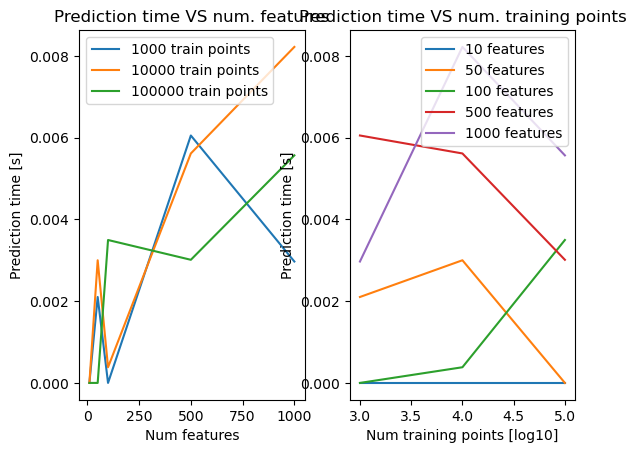

In [82]:
plt.subplot(1, 2, 1)
for n_train in n_train_v:
    x = n_features_v
    y = [np.mean(results['LR'][(n_train, n_features)]['pred']) for n_features in n_features_v]
    plt.plot(x, y, label=str(n_train) + " train points")

plt.title('Prediction time VS num. features')
plt.xlabel('Num features')
plt.ylabel('Prediction time [s]')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
for n_features in n_features_v:
    x = np.log10(n_train_v)
    y = [np.mean(results['LR'][(n_train, n_features)]['pred']) for n_train in n_train_v]
    plt.plot(x, y, label=str(n_features) + " features")

plt.title('Prediction time VS num. training points')
plt.xlabel('Num training points [log10]')
plt.ylabel('Prediction time [s]')
plt.legend(loc=0)

plt.show()


테스트 시간은 특성 수의 선형 함수로 조정

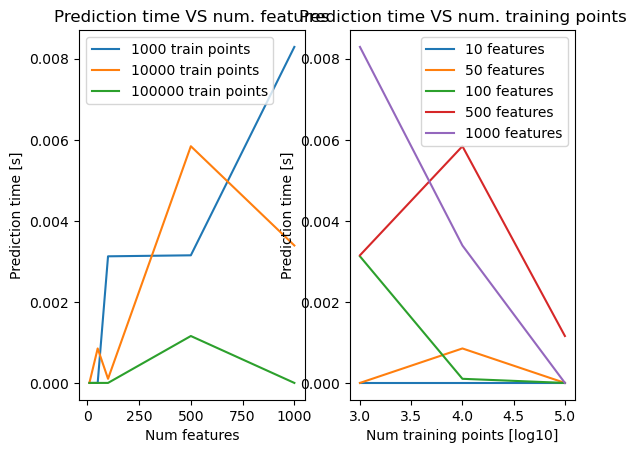

In [83]:
plt.subplot(1, 2, 1)
for n_train in n_train_v:
    x = n_features_v
    y = [np.mean(results['SGD'][(n_train, n_features)]['pred']) for n_features in n_features_v]
    plt.plot(x, y, label=str(n_train) + " train points")

plt.title('Prediction time VS num. features')
plt.xlabel('Num features')
plt.ylabel('Prediction time [s]')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
for n_features in n_features_v:
    x = np.log10(n_train_v)
    y = [np.mean(results['SGD'][(n_train, n_features)]['pred']) for n_train in n_train_v]
    plt.plot(x, y, label=str(n_features) + " features")

plt.title('Prediction time VS num. training points')
plt.xlabel('Num training points [log10]')
plt.ylabel('Prediction time [s]')
plt.legend(loc=0)

plt.show()


SGD 기반 학습자를 테스트 데이터셋에 적용하면 다른 구현과 거의 동일한 시간이 소요됨

### 온라인 미니 배치 학습
: 빅데이터의 경우 SGD 기반 학습이 더 빠르고 확장성 있기 때문에 항상 SGD 기반 학습자를 사용

In [84]:
# Let's generate a IM dataset
X_train, X_test, y_train, y_test = generate_dataset(2000000,
10000, 100, 10.0)
print("Size of X_train is [GB]:", X_train.size * X_train[0,0].
itemsize/19)

Size of X_train is [GB]: 84210526.31578948


In [85]:
from sklearn.metrics import mean_absolute_error
regr = SGDRegressor (random_state=101)
tick = time. time()

regr. fit(X_train, y_train)
print( "With SGD, after", time.time() - tick, "seconds")
pred = regr. predict(X
_test)
print("the MAE is [log10]:", np. log10(mean _absolute_errory_test,
pred) ))

SyntaxError: unmatched ')' (2591451050.py, line 10)

In [ ]:
from sklearn.metrics import mean_absolute_error
import time
from sklearn.linear_model import SGDRegressor
from sklearn.utils import resample
import numpy as np

def get_minibatch(X, y, batch_size):
    # We will shuffle consistently the training observations
    x, y = resample(X, y, replace=False, random_state=101)
    n_cols = y.shape[0]
    for i in range(int(n_cols / batch_size)):
        yield (X[i * batch_size: (i + 1) * batch_size, :], y[i * batch_size: (i + 1) * batch_size])
    if n_cols % batch_size > 0:
        res_rows = n_cols % batch_size
        yield (X[-res_rows:, :], y[-res_rows:])

plot_x = []
plot_y = []
plot_labels = []

for batch_size in (1000, 10000, 100000):
    regr = SGDRegressor(random_state=101)
    training_time = 0.0
    x = []
    y = []

    for dataset in get_minibatch(X_train, y_train, batch_size):
        tick = time.time()
        regr.partial_fit(dataset[0], dataset[1])
        training_time += (time.time() - tick)
        
    pred = regr.predict(X_test)
    x.append(training_time)
    y.append(np.log10(mean_absolute_error(y_test, pred)))
    
    print("Report: Mini-batch size", batch_size)
    print("First output after [s]:", x[0])
    print("First model MAE [log10]:", y[0])
    print("Total training time [s]:", x[-1])
    print("Final MAE [10g10]: ", y[-1])
    print()

    plot_x.append(x)
    plot_y.append(y)
    plot_labels.append("Batch size: " + str(batch_size))


In [ ]:
plt. subplot(1,2,1)
for i in range(len(plot_x)):
plt. plot(plot_xi], plot_yli], label=plot_labels[i])
plt. title( 'Mini-batch learning') plt.xlabel( 'Training time [s]')
plt. ylabel ( 'MAE' )
plt. legend (loc=0)
plt. subplot(1,2,2)
for i in range( len(plot_x)):
plt.plot(plot_[i], plot_y[i], label=plot_labels[i])
plt.title( 'Mini-batch learning: ZOOM 0-0.15s') plt.xlabel( 'Training time [s]' )
plt. ylabel ( 'MAE' )
plt. xlim( [0, 0.15])
plt. legend (loc=0)
plt.show( )

### 실제 예제

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import HashingVectorizer

to_remove = ('headers', 'footers', 'quotes')

data_train = fetch_20newsgroups(subset='train', random_state=101, remove=to_remove)
data_test = fetch_20newsgroups(subset='test', random_state=101, remove=to_remove)

labels = data_train.target_names
targets = np.unique(data_train.target)


In [ ]:
def get_minibatch_docs(docs, targets, batch_size):
    n_docs = len(docs)
    for i in range(int(n_docs / batch_size)):
        yield (docs[i * batch_size: (i + 1) * batch_size], targets[i * batch_size: (i + 1) * batch_size])
    if n_docs % batch_size > 0:
        res_rows = n_docs % batch_size
        yield (docs[-res_rows:], targets[-res_rows:])


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import sys

minibatch_size = 1000
values_to_plot = {}

for hash_table_size in (1000, 5000, 10000, 50000, 100000):
    values_to_plot[hash_table_size] = {'time': [], 'score': []}
    vectorizer = HashingVectorizer(stop_words='english', non_negative=True, n_features=hash_table_size, ngram_range=(1, 1))
    X_test = vectorizer.transform(data_test.data)
    y_test = data_test.target
    clf = SGDClassifier(loss='log')
    timings = []

    for minibatch in get_minibatch_docs(data_train.data, data_train.target, minibatch_size):
        y_train = minibatch[1]
        tick = time.time()
        X_train = vectorizer.transform(minibatch[0])
        clf.partial_fit(X_train, y_train)
        timings.append(time.time() - tick)
        pred = clf.predict(X_test)
        values_to_plot[hash_table_size]['score'].append(accuracy_score(y_test, pred))
    values_to_plot[hash_table_size]['time'] = np.cumsum(timings)


In [ ]:
for k, v in sorted(values_to_plot.items()):
    plt.plot(v['time'], v['score'], 'x-', label='Hashsize size ' + str(k))  # 수정
plt.title('Mini-batch learning: 20newsgroups')
plt.xlabel('Training time [s]')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()
